In [255]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)


In [462]:
df1 = pd.read_csv("House_Data_Pune.csv")
df1.head(10)

,area_type,location,Society,size,Baths,total_sqft,price,availability,Unnamed: 8,Unnamed: 9
0,Super Built-up Area,Bavdhan,Satyam Shrey,2 bhk,2.0,640,55.96,Under construction,NaN,NaN
1,Built-up Area,Sus,Kiran Sanskriti,2 bhk,2.0,690-720,45.00,Under construction,NaN,NaN
2,Built-up Area,Tathawade,Vivanta,2 bhk,2.0,688-693,60.00,Under construction,NaN,NaN
3,Super Built-up Area,Koregaon Park,Sunit Anant,3 bhk,3.0,1659,210.00,Ready to move,NaN,NaN
4,Built-up Area,Sinhgad Road,Nanded city,3 bhk,3.0,1450,78.00,Ready to move,NaN,NaN
5,Super Built-up Area,Koregaon Park,New Akshaya,2 bhk,2.0,1300,100.00,Ready to move,NaN,NaN
6,Super Built-up Area,Bibwewadi,Sukhsagar Nagar,2 bhk,2.0,850-950,50.00,Ready to move,NaN,NaN
7,Super Built-up Area,Koregaon Park,Tulip,2 bhk,2.0,1080,95.00,Ready to move,NaN,NaN
8,Built-up Area,Dhankawadi,Ganga Altus,3 bhk,3.0,850-950,87.50,Under construction,NaN,NaN
9,Built-up Area,Dhankawadi,Ganga Altus,2 bhk,2.0,650-750,67.50,Under construction,NaN,NaN


In [463]:
df1.shape

(1629, 10)

In [464]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area           56
Built-up Area           175
Built-up area             4
Carpet Area               3
Plot  Area               42
Plot Area                21
Super Built-up Area     152
Super built-up  Area    193
Villa                     1
Name: area_type, dtype: int64

In [465]:
df2 = df1.drop(['area_type','Unnamed: 8','Unnamed: 9','availability'],axis='columns')
df2.head()

,location,Society,size,Baths,total_sqft,price
0,Bavdhan,Satyam Shrey,2 bhk,2.0,640,55.96
1,Sus,Kiran Sanskriti,2 bhk,2.0,690-720,45.00
2,Tathawade,Vivanta,2 bhk,2.0,688-693,60.00
3,Koregaon Park,Sunit Anant,3 bhk,3.0,1659,210.00
4,Sinhgad Road,Nanded city,3 bhk,3.0,1450,78.00


In [466]:
df2.isnull().sum()

location         0
Society       1327
size             3
Baths           13
total_sqft       1
price            0
dtype: int64

In [467]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
Society       0
size          0
Baths         0
total_sqft    0
price         0
dtype: int64

In [468]:
df3['size'].unique()

array(['2 bhk', '3 bhk', '1 bhk', '4 bhk', '1 RK', '10 bhk', '6 bhk',
       '5 bhk', '1 rk', '1 Rk', '1  bhk', '8 bhk'], dtype=object)

In [469]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

C:\Users\SANJAY\AppData\Local\Temp\ipykernel_9664\3620022870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,Society,size,Baths,total_sqft,price,bhk
0,Bavdhan,Satyam Shrey,2 bhk,2.0,640,55.96,2
1,Sus,Kiran Sanskriti,2 bhk,2.0,690-720,45.00,2
2,Tathawade,Vivanta,2 bhk,2.0,688-693,60.00,2
3,Koregaon Park,Sunit Anant,3 bhk,3.0,1659,210.00,3
4,Sinhgad Road,Nanded city,3 bhk,3.0,1450,78.00,3


In [470]:
df3['bhk'].unique()

array([ 2,  3,  1,  4, 10,  6,  5,  8], dtype=int64)

In [473]:
df3[df3.bhk<10]

,location,Society,size,Baths,total_sqft,price,bhk
0,Bavdhan,Satyam Shrey,2 bhk,2.0,640,55.96,2
1,Sus,Kiran Sanskriti,2 bhk,2.0,690-720,45.00,2
2,Tathawade,Vivanta,2 bhk,2.0,688-693,60.00,2
3,Koregaon Park,Sunit Anant,3 bhk,3.0,1659,210.00,3
4,Sinhgad Road,Nanded city,3 bhk,3.0,1450,78.00,3
...,...,...,...,...,...,...,...
353,Dhankawadi,Tanaji,1 bhk,1.0,325,19.00,1
355,Dhankawadi,kala nagar,8 bhk,7.0,3300,225.00,8
356,Dhankawadi,Raut Baug,1 bhk,1.0,560,37.00,1
357,Dhankawadi,Pride,3 bhk,3.0,1170,155.00,3


In [474]:
df3.total_sqft.unique()

array(['640', '690-720 ', '688-693 ', '1659', '1450', '1300', '850-950 ',
       '1080', '650-750 ', '645-716 ', '346-384 ', '627-628 ', '573-606 ',
       '850', '660', '1140', '905', '1050', '2100', '607', '605', '680',
       '865-1168 ', '350', '970', '750', '450', '550', '915', '460',
       '608', '580', '950', '530', '525', '400', '820', '1109', '570',
       '975', '1200', '633', '500', '2600', '625', '1170', '2269', '2639',
       '620', '667', '900', '1090', '601', '380', '930', '715', '420',
       '2400', '494', '860', '600', '1250', '9440', '1270', '1610',
       '5500', '2000', '2300', '1185', '10000', '1180', '3000', '1500',
       '6280', '1054', '504', '1743.75', '661', '305', '1431.6', '757',
       '835', '926', '914', '253', '1060', '506', '700', '733', '800',
       '470', '810', '1106', '1000', '1175-1748', '1309-1431', '1271',
       '1010', '540', '528', '595', '670', '516', '560', '385', '590',
       '602', '545', '617', '780', '610', '575', '648', '722', '527

In [475]:
def is_float(x):
    try:
        float(x)
    except:
      return False 
    return True

In [476]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,Society,size,Baths,total_sqft,price,bhk
1,Sus,Kiran Sanskriti,2 bhk,2.0,690-720,45.00,2
2,Tathawade,Vivanta,2 bhk,2.0,688-693,60.00,2
6,Bibwewadi,Sukhsagar Nagar,2 bhk,2.0,850-950,50.00,2
8,Dhankawadi,Ganga Altus,3 bhk,3.0,850-950,87.50,3
9,Dhankawadi,Ganga Altus,2 bhk,2.0,650-750,67.50,2
10,Hinjewadi,Rohan Ipsita,2 bhk,2.0,645-716,59.43,2
11,Hinjewadi,Rohan Ipsita,1 bhk,1.0,346-384,37.00,1
12,Moshi,Kasturi,2 bhk,2.0,627-628,72.00,2
13,Baner,Rachana,2 bhk,2.0,573-606,69.00,2
28,Bibwewadi,Pride Purple,2 bhk,2.0,865-1168,105.50,2


In [477]:
def convert_s_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [478]:
convert_s_to_num('20')

20.0

In [479]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_s_to_num)
df4.head(3)

,location,Society,size,Baths,total_sqft,price,bhk
0,Bavdhan,Satyam Shrey,2 bhk,2.0,640.0,55.96,2
1,Sus,Kiran Sanskriti,2 bhk,2.0,705.0,45.00,2
2,Tathawade,Vivanta,2 bhk,2.0,690.5,60.00,2


In [480]:
df4.iloc[10]

location         Hinjewadi
Society       Rohan Ipsita
size                 2 bhk
Baths                  2.0
total_sqft           680.5
price                59.43
bhk                      2
Name: 10, dtype: object

In [481]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head(10)

,location,Society,size,Baths,total_sqft,price,bhk,price_per_sqft
0,Bavdhan,Satyam Shrey,2 bhk,2.0,640.0,55.96,2,8743.750000
1,Sus,Kiran Sanskriti,2 bhk,2.0,705.0,45.00,2,6382.978723
2,Tathawade,Vivanta,2 bhk,2.0,690.5,60.00,2,8689.355539
3,Koregaon Park,Sunit Anant,3 bhk,3.0,1659.0,210.00,3,12658.227848
4,Sinhgad Road,Nanded city,3 bhk,3.0,1450.0,78.00,3,5379.310345
5,Koregaon Park,New Akshaya,2 bhk,2.0,1300.0,100.00,2,7692.307692
6,Bibwewadi,Sukhsagar Nagar,2 bhk,2.0,900.0,50.00,2,5555.555556
7,Koregaon Park,Tulip,2 bhk,2.0,1080.0,95.00,2,8796.296296
8,Dhankawadi,Ganga Altus,3 bhk,3.0,900.0,87.50,3,9722.222222
9,Dhankawadi,Ganga Altus,2 bhk,2.0,700.0,67.50,2,9642.857143


In [482]:
len(df5.location.unique())

24

In [483]:
df5.location=df5.location.apply(lambda x: x.strip())
location_stats= df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Bibwewadi            95
Dhankawadi           70
Katraj               39
Hadapsar             21
Koregaon Park        17
Sinhgad Road         16
Karve Nagar          16
Bavdhan               3
Padmavati             3
Meera nagar           2
Sus                   2
Shivaji Nagar         2
Amanora town          2
Ambegaon              2
Hinjewadi             2
Mohan Nagar           1
Moshi                 1
Kondhwa               1
Samarth Nagar         1
Kanchan Nagari        1
Baner                 1
Tathawade             1
Vighnaharta Nagar     1
Wakad                 1
Name: location, dtype: int64

In [484]:
len(location_stats[location_stats<10])

17

In [485]:
location_stats_less_than_10 = location_stats[location_stats<10] 
location_stats_less_than_10

location
Bavdhan              3
Padmavati            3
Meera nagar          2
Sus                  2
Shivaji Nagar        2
Amanora town         2
Ambegaon             2
Hinjewadi            2
Mohan Nagar          1
Moshi                1
Kondhwa              1
Samarth Nagar        1
Kanchan Nagari       1
Baner                1
Tathawade            1
Vighnaharta Nagar    1
Wakad                1
Name: location, dtype: int64

In [486]:
len(df5.location.unique())

24

In [487]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

8

In [488]:
df5.head(10)

,location,Society,size,Baths,total_sqft,price,bhk,price_per_sqft
0,other,Satyam Shrey,2 bhk,2.0,640.0,55.96,2,8743.750000
1,other,Kiran Sanskriti,2 bhk,2.0,705.0,45.00,2,6382.978723
2,other,Vivanta,2 bhk,2.0,690.5,60.00,2,8689.355539
3,Koregaon Park,Sunit Anant,3 bhk,3.0,1659.0,210.00,3,12658.227848
4,Sinhgad Road,Nanded city,3 bhk,3.0,1450.0,78.00,3,5379.310345
5,Koregaon Park,New Akshaya,2 bhk,2.0,1300.0,100.00,2,7692.307692
6,Bibwewadi,Sukhsagar Nagar,2 bhk,2.0,900.0,50.00,2,5555.555556
7,Koregaon Park,Tulip,2 bhk,2.0,1080.0,95.00,2,8796.296296
8,Dhankawadi,Ganga Altus,3 bhk,3.0,900.0,87.50,3,9722.222222
9,Dhankawadi,Ganga Altus,2 bhk,2.0,700.0,67.50,2,9642.857143


In [489]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,Society,size,Baths,total_sqft,price,bhk,price_per_sqft
13,other,Rachana,2 bhk,2.0,589.5,69.00,2,11704.834606
124,Sinhgad Road,Monte Rosa,2 bhk,2.0,253.0,116.00,2,45849.802372
224,Katraj,Shree Ganesh Vihar,1 rk,1.0,265.0,12.00,1,4528.301887
247,Hadapsar,Shapoorji annexe,3 bhk,3.0,820.0,70.02,3,8539.024390
262,Karve Nagar,Basera hsg soc,4 bhk,3.0,1000.0,130.00,4,13000.000000


In [490]:
df5.shape

(301, 8)

In [491]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(293, 8)

In [492]:
df6.price_per_sqft.describe()

count      293.000000
mean      8541.824551
std       3232.291201
min       2631.578947
25%       6406.250000
50%       8050.847458
75%       9913.043478
max      30000.000000
Name: price_per_sqft, dtype: float64

In [493]:
 def remove_pps_outliers(df):
        df_out = pd.DataFrame()
        for key, subdf in df.groupby('location'):
            m= np.mean(subdf.price_per_sqft) #cal mean
            st = np.std(subdf.price_per_sqft) #cal standard deviation
            reduced_df=subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<=(m+st))]
            df_out = pd.concat([df_out,reduced_df],ignore_index = True)
        return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(215, 8)

TypeError: 'str' object is not callable

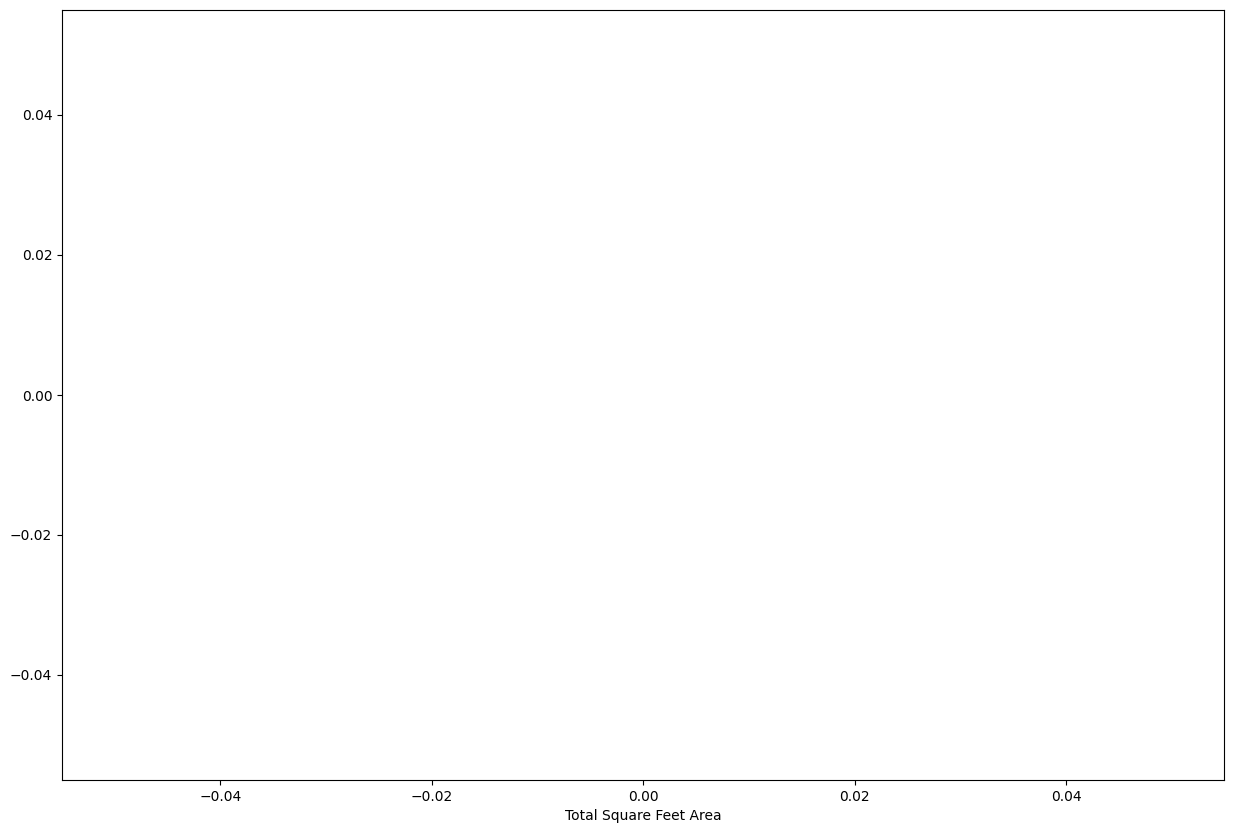

In [494]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location == location) & (df.bhk==2)]
    bhk3=df[(df.location == location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10) 
    plt.scatter(bhk2.total_sqft,bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('price')
    plt.title(location)
    plt.legend()
plot_scatter_chart(df7, 'Baner')    
    

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats ['count']>5:
                exclude_indices =np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

TypeError: 'str' object is not callable

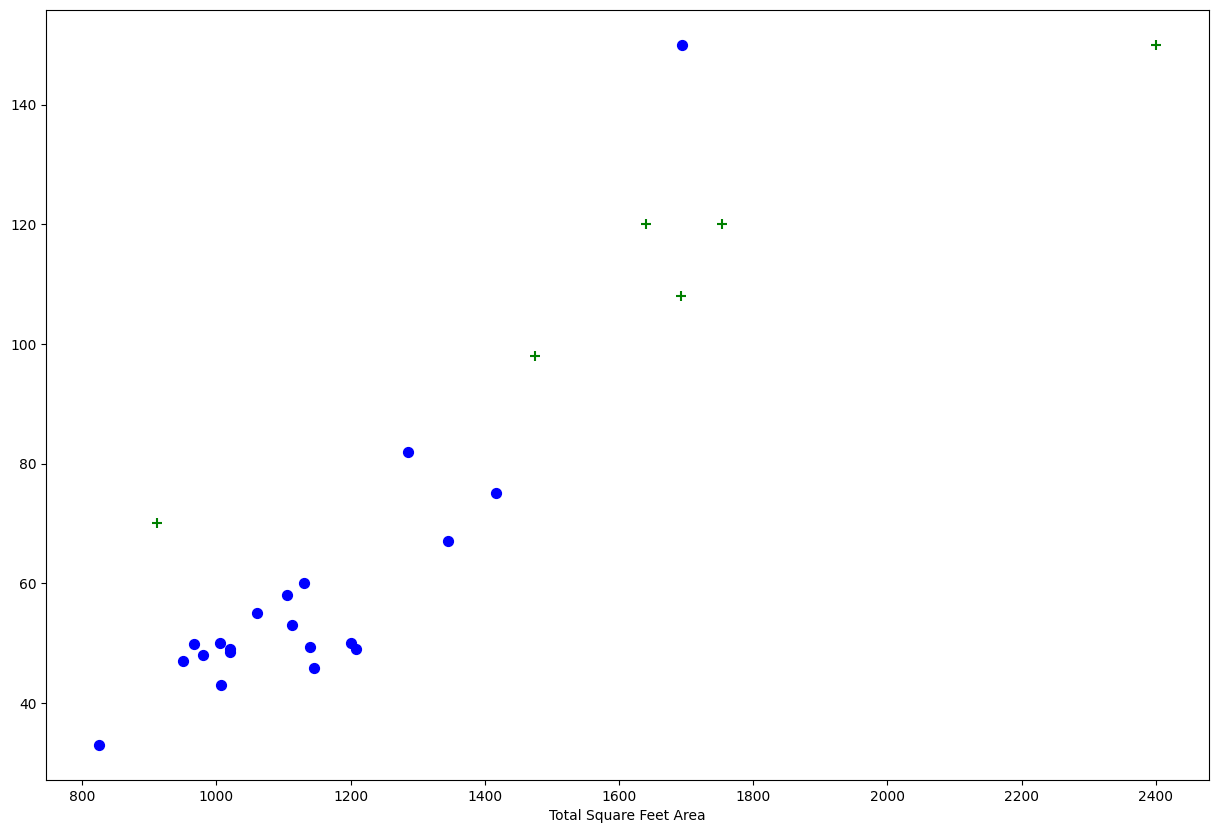

In [495]:
plot_scatter_chart(df8, 'Baner') 

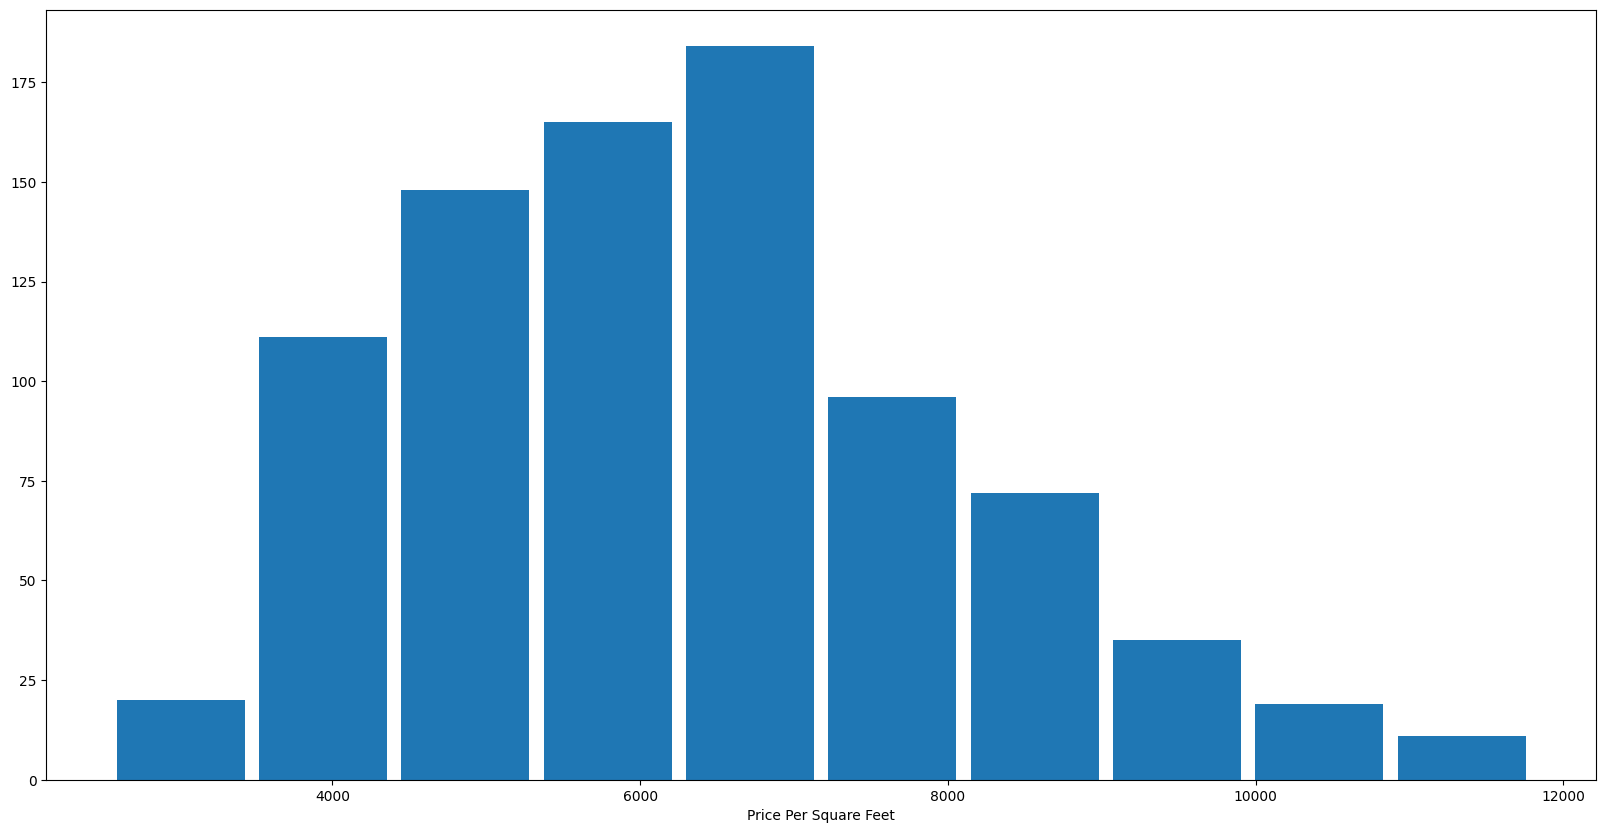

In [496]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft, rwidth=0.9)
plt.xlabel("Price Per Square Feet")
plt.ylabel=("Count")



In [497]:
df8.Baths.unique()

array([2., 1., 3., 4., 5., 7., 6., 8., 9.])

In [498]:
df8[df8.Baths>5]

,location,size,Baths,total_sqft,price,bhk,price_per_sqft
258,Bibwewadi,5 bhk,7.0,4500.0,337.0,5,7488.888889
285,Bibwewadi,7 bhk,6.0,2500.0,115.0,7,4600.000000
379,Dhankawadi,8 bhk,7.0,3300.0,225.0,8,6818.181818
396,Dhankawadi,8 bhk,8.0,3000.0,140.0,8,4666.666667
405,Dhankawadi,8 bhk,8.0,5000.0,250.0,8,5000.000000
441,Dhankawadi,11 bhk,9.0,5000.0,360.0,11,7200.000000
470,FC Road,6 bhk,6.0,3600.0,141.0,6,3916.666667
494,Hadapsar,6 bhk,7.0,5500.0,600.0,6,10909.090909
514,Hadapsar,6 bhk,7.0,3000.0,210.0,6,7000.000000
711,Katraj,7 bhk,7.0,4000.0,225.0,7,5625.000000


TypeError: 'str' object is not callable

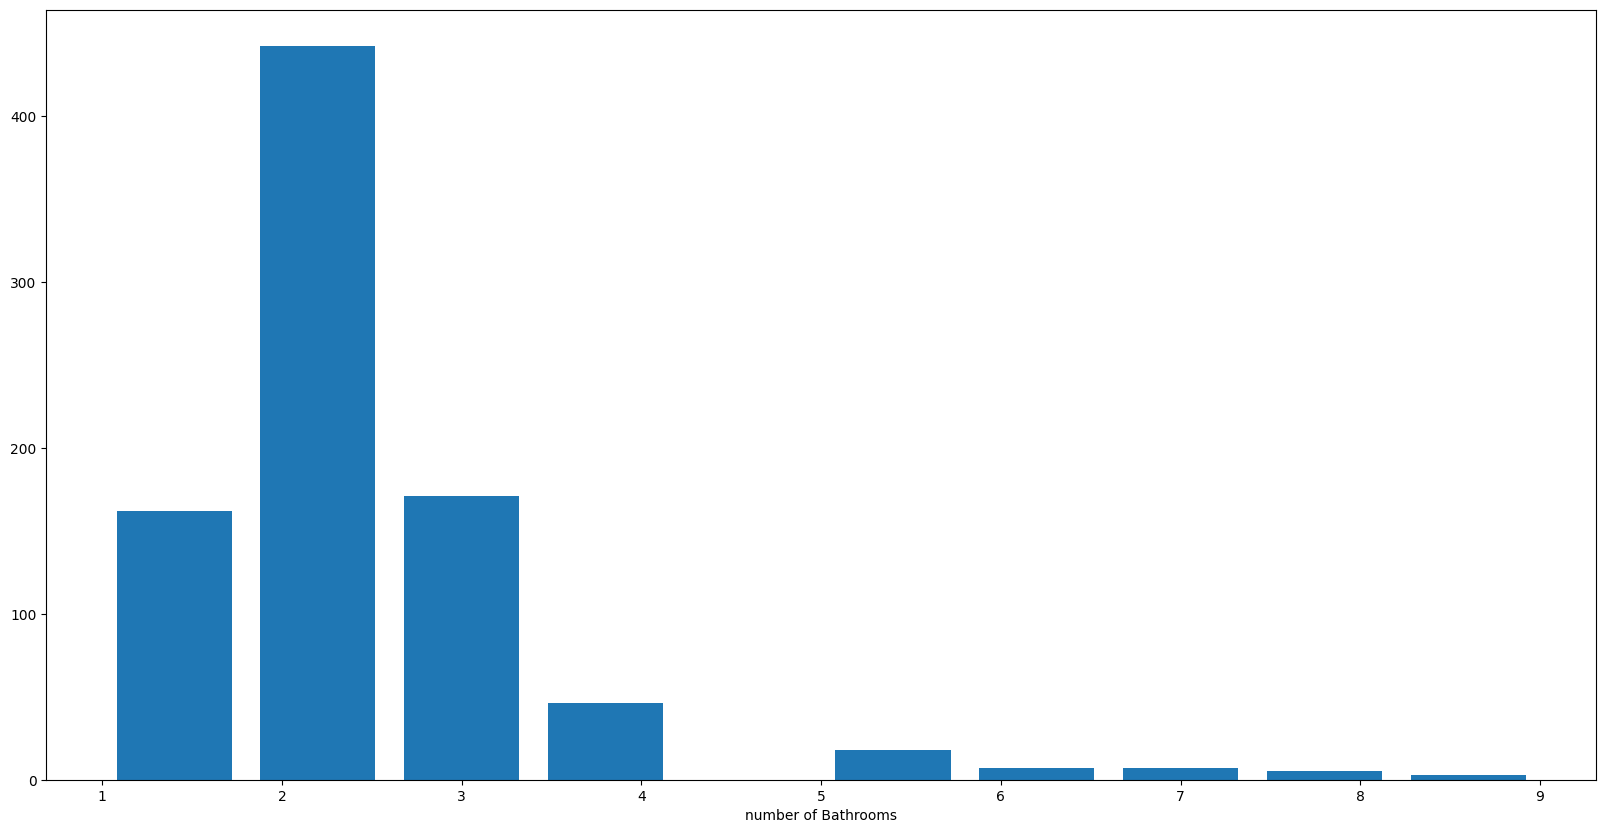

In [499]:
plt.hist(df8.Baths,rwidth=0.8)
plt.xlabel('number of Bathrooms')
plt.ylabel('count')

In [500]:
df8[df8.Baths>df8.bhk+2]

,location,size,Baths,total_sqft,price,bhk,price_per_sqft


In [501]:
df8.shape

(861, 7)

In [502]:
df9 = df8.drop(['size','price_per_sqft'],axis='columns')
df9.head(3)

,location,Baths,total_sqft,price,bhk
0,AB Chowk,2.0,1143.0,45.0,2
1,AB Chowk,1.0,600.0,38.0,1
2,AB Chowk,2.0,950.0,57.0,2


In [503]:
dumies=pd.get_dummies(df9.location)
dumies.head()

,AB Chowk,Amanora Town,Ambegaon,Balaji Nagar,Baner,Bibwewadi,Budhwar Peth,Bund Garden,Camp,Deccan Gymkhana,...,Koregaon Park,Kothrud,Market yard,Padmavati,Pune Railway Station,Sahakar Nagar,Shivaji Nagar,Sinhgad Road,Swargate,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [504]:
df11 = pd.concat([df9, dumies.drop('other' , axis='columns')],axis='columns')
df11.head(3)

,location,Baths,total_sqft,price,bhk,AB Chowk,Amanora Town,Ambegaon,Balaji Nagar,Baner,...,Kondhwa,Koregaon Park,Kothrud,Market yard,Padmavati,Pune Railway Station,Sahakar Nagar,Shivaji Nagar,Sinhgad Road,Swargate
0,AB Chowk,2.0,1143.0,45.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AB Chowk,1.0,600.0,38.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AB Chowk,2.0,950.0,57.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [505]:
df12=df11.drop('location', axis='columns')
df12.head(2)

,Baths,total_sqft,price,bhk,AB Chowk,Amanora Town,Ambegaon,Balaji Nagar,Baner,Bibwewadi,...,Kondhwa,Koregaon Park,Kothrud,Market yard,Padmavati,Pune Railway Station,Sahakar Nagar,Shivaji Nagar,Sinhgad Road,Swargate
0,2.0,1143.0,45.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,600.0,38.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [506]:
X=df12.drop('price', axis='columns')
X.head()

,Baths,total_sqft,bhk,AB Chowk,Amanora Town,Ambegaon,Balaji Nagar,Baner,Bibwewadi,Budhwar Peth,...,Kondhwa,Koregaon Park,Kothrud,Market yard,Padmavati,Pune Railway Station,Sahakar Nagar,Shivaji Nagar,Sinhgad Road,Swargate
0,2.0,1143.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,600.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,950.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,1073.5,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.0,1148.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [507]:
y= df12.price
y.head()

0    45.00
1    38.00
2    57.00
3    54.01
5    60.00
Name: price, dtype: float64

In [570]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [571]:
linear_model = LinearRegression()

In [572]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [573]:
training_data_prediction = linear_model.predict(X_train)

In [574]:
score_1 = metrics.r2_score(y_train,training_data_prediction )

In [575]:
print(score_1)

0.8981925018161168


In [591]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [595]:
from sklearn.linear_model import LinearRegression

lr_clf=LinearRegression() 
lr_clf.fit(X_train,y_train)

lr_clf.score (X_test,y_test)

0.9004604696160636

In [599]:
def predict_house(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]
    x= np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return linear_model.predict(
        [x])[0]
    

In [600]:
predict_house("AB Chowk",1200,1,1)

C:\Users\SANJAY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


8925.477809919937